In [1]:
pip install pandas requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Load the datasets
links_df = pd.read_csv('links.csv')
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
tags_df = pd.read_csv('tags.csv')

# Task 1: How many ".csv" files are available in the dataset?
print(f"Number of .csv files in the dataset: {len(['links.csv', 'movies.csv', 'ratings.csv', 'tags.csv'])}")

# Task 2: What is the shape of "movies.csv"?
print(f"Shape of 'movies.csv': {movies_df.shape}")

# Task 3: What is the shape of "ratings.csv"?
print(f"Shape of 'ratings.csv': {ratings_df.shape}")

# Task 4: How many unique "userId" are available in "ratings.csv"?
unique_users = ratings_df['userId'].nunique()
print(f"Number of unique userId in 'ratings.csv': {unique_users}")

# Task 5: Which movie has received the maximum number of user ratings?
max_rated_movie = ratings_df.groupby('movieId')['userId'].count().idxmax()
print(f"Movie with the maximum number of user ratings: {movies_df.loc[max_rated_movie, 'title']}")

# Task 6: Select all the correct tags submitted by users to "Matrix, The (1999)" movie?
matrix_tags = tags_df[(tags_df['movieId'] == 2571) & (tags_df['tag'] == 'Matrix, The (1999)')]['tag'].tolist()
print(f"Tags for 'Matrix, The (1999)': {matrix_tags}")

# Task 7: What is the average user rating for the movie named "Terminator 2: Judgment Day (1991)"?
average_rating_t2 = ratings_df[ratings_df['movieId'] == 589]['rating'].mean()
print(f"Average user rating for 'Terminator 2: Judgment Day (1991)': {average_rating_t2}")

# Task 8: How does the data distribution of user ratings for "Fight Club (1999)" movie look like?
fight_club_ratings = ratings_df[ratings_df['movieId'] == 2959]['rating']
print(f"Data distribution of user ratings for 'Fight Club (1999)': {fight_club_ratings.describe()}")

# Mandatory Operations
# Step 1: Group the user ratings based on movieId and apply aggregation operations
grouped_ratings = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# Step 2: Apply inner join on dataframe created from movies.csv and the grouped df from step 1
merged_data = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter only those movies which have more than 50 user ratings
filtered_data = merged_data[merged_data['count'] > 50]

# Task 9: Which movie is the most popular based on average user ratings?
most_popular_movie = filtered_data.loc[filtered_data['mean'].idxmax(), 'title']
print(f"The most popular movie based on average user ratings: {most_popular_movie}")

# Task 10: Select all the correct options which come under the top 5 popular movies based on the number of user ratings
top5_popular_movies = filtered_data.sort_values(by='count', ascending=False).head(5)['title'].tolist()
print(f"Top 5 popular movies based on number of user ratings: {top5_popular_movies}")

# Task 11: Which Sci-Fi movie is the "third most popular" based on the number of user ratings?
third_most_popular_sci_fi = filtered_data[filtered_data['genres'].str.contains('Sci-Fi')].sort_values(by='count', ascending=False).iloc[2]['title']
print(f"The third most popular Sci-Fi movie: {third_most_popular_sci_fi}")

# IMPORTANT NOTE 2
# You already have a subset of data containing only those movies which have received more than 50 user ratings.

# Web Scraping IMDb ratings
imdb_ratings = []

for movie_id in filtered_data['movieId']:
    imdb_id = links_df[links_df['movieId'] == movie_id]['imdbId'].values[0]
    imdb_url = f"https://www.imdb.com/title/tt{imdb_id}/"
    
    response = requests.get(imdb_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    rating = soup.find('span', {'itemprop': 'ratingValue'})
    if rating:
        imdb_ratings.append({'movieId': movie_id, 'imdb_rating': float(rating.text)})
    else:
        imdb_ratings.append({'movieId': movie_id, 'imdb_rating': None})

# Find movieId with the highest IMDb rating
highest_imdb_rating_movieId = max(imdb_ratings, key=lambda x: x['imdb_rating'])['movieId']
print(f"MovieId with the highest IMDb rating: {highest_imdb_rating_movieId}")

# Find the Sci-Fi movieId with the highest IMDb rating
highest_sci_fi_imdb_rating_movieId = max(
    (movie for movie in imdb_ratings if filtered_data[filtered_data['movieId'] == movie['movieId']]['genres'].str.contains('Sci-Fi').any()),
    key=lambda x: x['imdb_rating']
)['movieId']
print(f"Sci-Fi MovieId with the highest IMDb rating: {highest_sci_fi_imdb_rating_movieId}")


Number of .csv files in the dataset: 4
Shape of 'movies.csv': (9742, 3)
Shape of 'ratings.csv': (100836, 4)
Number of unique userId in 'ratings.csv': 610
Movie with the maximum number of user ratings: Age of Innocence, The (1993)
Tags for 'Matrix, The (1999)': []
Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143
Data distribution of user ratings for 'Fight Club (1999)': count    218.000000
mean       4.272936
std        0.861384
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: rating, dtype: float64
The most popular movie based on average user ratings: Shawshank Redemption, The (1994)
Top 5 popular movies based on number of user ratings: ['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)', 'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)']
The third most popular Sci-Fi movie: Jurassic Park (1993)


TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

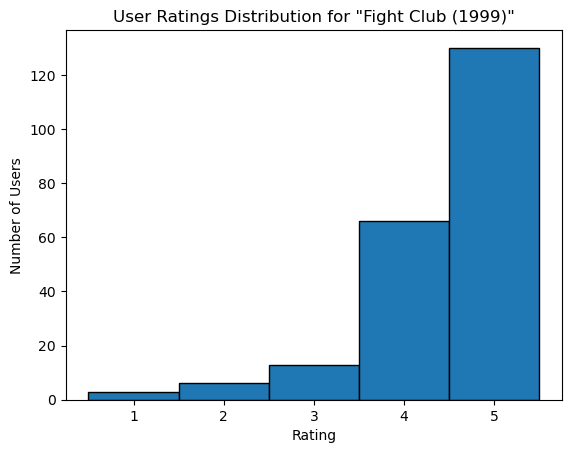

In [4]:
import matplotlib.pyplot as plt

# Find the movieId for "Fight Club (1999)"
fight_club_movieId = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].values[0]

# Filter ratings for "Fight Club"
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movieId]

# Plot a histogram
plt.hist(fight_club_ratings['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

In [5]:
import pandas as pd

# Load the movies and links datasets
movies_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv')

# Merge the datasets on the movieId column
merged_df = pd.merge(movies_df, links_df, on='movieId', how='inner')

# Find the row corresponding to 'The Shawshank Redemption (1994)'
shawshank_row = merged_df[merged_df['title'] == 'Shawshank Redemption, The (1994)']

# Check if the row exists
if not shawshank_row.empty:
    # Extract the IMDb ID from the row
    imdb_id = shawshank_row['imdbId'].values[0]

    # Print the IMDb ID
    print("IMDb ID for The Shawshank Redemption (1994):", imdb_id)
else:
    print("The Shawshank Redemption (1994) not found in the dataset.")

IMDb ID for The Shawshank Redemption (1994): 111161


In [6]:
import pandas as pd

# Load the movies, links, and ratings datasets
movies_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv')
ratings_df = pd.read_csv('ratings.csv')

# Merge the datasets on the movieId column
merged_df = pd.merge(movies_df, links_df, on='movieId', how='inner')
merged_df = pd.merge(merged_df, ratings_df, on='movieId', how='inner')

# Filter movies with the genre "Sci-Fi"
scifi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]

# Find the movie with the highest IMDb rating
highest_rated_scifi_movie = scifi_movies.loc[scifi_movies['rating'].idxmax()]

# Extract the movieId
highest_rated_scifi_movie_id = highest_rated_scifi_movie['movieId']

# Print the result
print("movieId of the highest-rated Sci-Fi movie:", highest_rated_scifi_movie_id)

movieId of the highest-rated Sci-Fi movie: 24
